In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

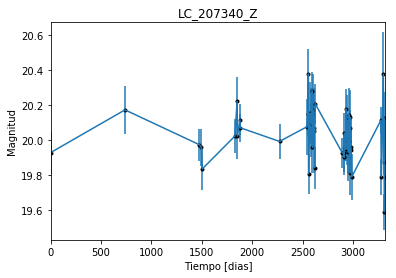

In [2]:
data = np.genfromtxt('LC_207340_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_207340_Z')
plt.savefig("LC_207340_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

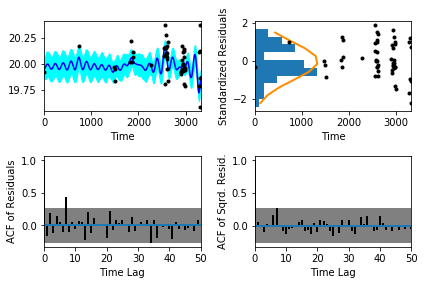

In [5]:
sample.assess_fit()

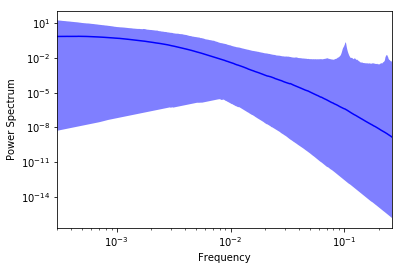

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

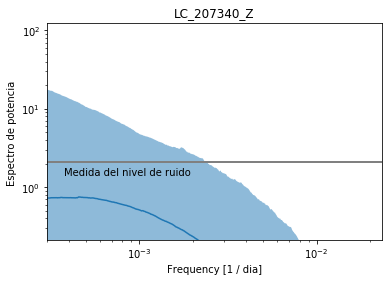

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_207340_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_207340_Z')

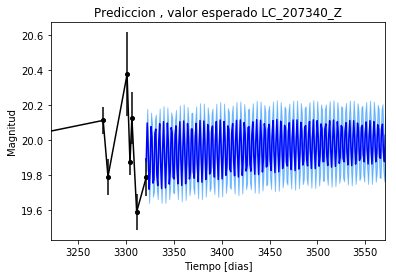

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_207340_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_207340_Z')

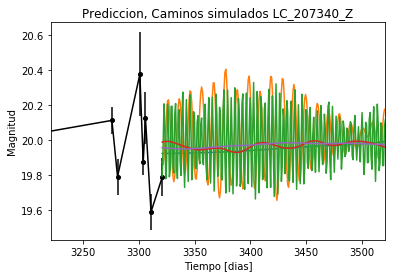

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_207340_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


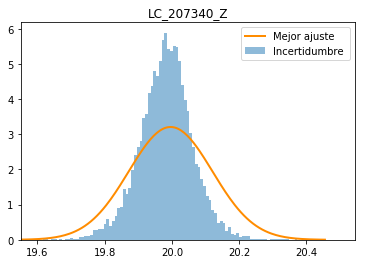

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_207340_Z')
plt.savefig("Mejor_ajuste_LC_207340_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_207340_Z')

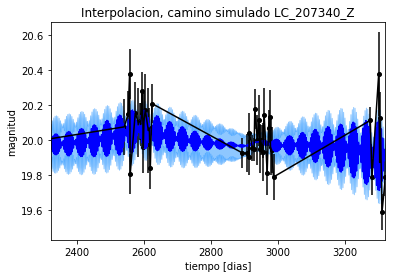

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_207340_Z')

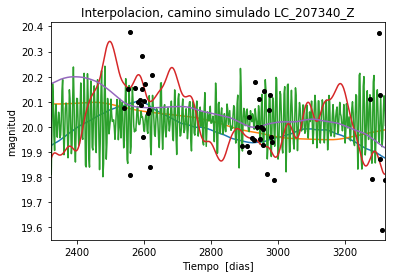

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1296.843584
Median: 0.00433959720051
Standard deviation: 0.0912137275538
68% credibility interval: [ 0.0006525   0.07340752]
95% credibility interval: [  3.30265243e-04   3.71975650e-01]
99% credibility interval: [  3.08435302e-04   4.87630889e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 455.956161907
Median: 0.00219112299781
Standard deviation: 0.0574873887692
68% credibility interval: [ 0.00051381  0.02305775]
95% credibility interval: [ 0.0003226   0.20201597]
99% credibility interval: [  3.05656502e-04   4.10498113e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 554.801134407
Median: 0.00966291333806
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 568.454045562
Median: 52.0071366377
Standard deviation: 1.65917843955
68% credibility interval: [ 50.31172038  53.04875803]
95% credibility interval: [ 47.94557477  54.93999683]
99% credibility interval: [ 45.97489841  56.57138866]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 453.392726354
Median: 0.381818392816
Standard deviation: 1.1659031094
68% credibility interval: [ 0.03929115  2.0570326 ]
95% credibility interval: [ 0.01244109  3.88570108]
99% credibility interval: [ 0.00985281  5.7718621 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 440.325690044
Median: 0.383292403902
Standard deviation: 3.3095216604
68% credibility interval: [ 0.0109619   4.27650843]
95% credibility interval: [  5.29649400e-04 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5269.18209743
Median: 4.26993202296e-21
Standard deviation: 5.14993570151e+71
68% credibility interval: [  1.31050876e-65   8.19768052e+28]
95% credibility interval: [  4.40565513e-111   4.35337818e+066]
99% credibility interval: [  1.85672148e-135   2.11875538e+068]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2146.38080294
Median: 20.0013181771
Standard deviation: 0.0427590589361
68% credibility interval: [ 19.96543817  20.03472477]
95% credibility interval: [ 19.90843788  20.08220484]
99% credibility interval: [ 19.85326099  20.13486492]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 769.81881027
Median: 0.039110099093
Standard deviation: 0.150450837898
68% credibility interval: [ 0.         0.2983546]
95% credibility interval: [ 0.          0.47547933]
99% credibility interval: [ 0.          0.51876893]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 769.81881027
Median: 0.039110099093
Standard deviation: 0.150450837898
68% credibility interval: [ 0.         0.2983546]
95% credibility interval: [ 0.          0.47547933]
99% credibility interval: [ 0.          0.51876893]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 378.398670138
Median: 0.0
Standard deviation: 0.0518722493275
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 568.454045562
Median: 52.0071366377
Standard deviation: 1.65917843955
68% credibility interval: [ 50.31172038  53.04875803]
95% credibility interval: [ 47.94557477  54.93999683]
99% credibility interval: [ 45.97489841  56.57138866]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2504.88346224
Median: 0.00656974071119
Standard deviation: 0.0110424623927
68% credibility interval: [ 0.00255105  0.01455434]
95% credibility interval: [ 0.00050101  0.03486853]
99% credibility interval: [  2.90532492e-05   6.69984362e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 925.078374937
Median: 1.11115597729
Standard deviation: 0.178217313956
68% credibility interval: [ 0.94425859  1.2917359 ]
95% credibility interval: [ 0.81812617  1.50887217]
99% credibility interval: [ 0.7420698   1.66275805]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 468.813246139
Median: 1.19734566186e-05
Standard deviation: 0.0957275642526
68% credibility interval: [  7.68218064e-33   2.61400004e-03]
95% credibility interval: [  1.81498385e-69   1.10563207e-01]
99% credibility interval: [  4.77944530e-73   5.91848458e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1296.843584
Median: (-0.0272664933693-0.0552094716434j)
Standard deviation: 1.10547282089
68% credibility interval: [-0.46123303+0.j         -0.00409979-0.08844612j]
95% credibility interval: [ -2.33719194e+00+0.j          -2.07511772e-03-0.86985122j]
99% credibility interval: [ -3.06387524e+00+0.j          -1.93795616e-03-1.26091416j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 455.956161907
Median: (-0.0137672318261+0.0803916971372j)
Standard deviation: 1.01196847757
68% credibility interval: [-0.14487614+1.02644497j -0.00322839+0.03459481j]
95% credibility interval: [-1.26930375+2.85406724j -0.00202694+1.71876771j]
99% credibility interval: [ -2.57923571e+00+1.0588721j   -1.92049644e-03+0.66005678j]
Posterior su